# Comparison of models for cosmic ray spectrum

In [6]:
from pylab import *

## Dembinski model

In [9]:
data = np.genfromtxt('CRdatadriven.txt')
E = data[:,0]
# Data is in (GeV cm^2 s sr)^-1, have to be renormalized
phi_p_Dembinski = data[:,1] * 1e4
phi_He_Dembinski = data[:,2] * 1e4
phi_Dembinski = np.zeros((len(data[:,0]), len((data[0,:]))))
phi_total_Dembinski = np.zeros(len(data[:,0]))
for i in range(1,29):
    phi_Dembinski[:,i] = data[:,i] * 1e4
    phi_total_Dembinski += phi_Dembinski[:,i]
    
phi_heavy_Dembinski = np.zeros(len(data[:,0]))
for i in range(3,29):
    phi_Dembinski[:,i] = data[:,i] * 1e4
    phi_heavy_Dembinski += phi_Dembinski[:,i]

Text(0.5, 1.0, 'Dembinski model')

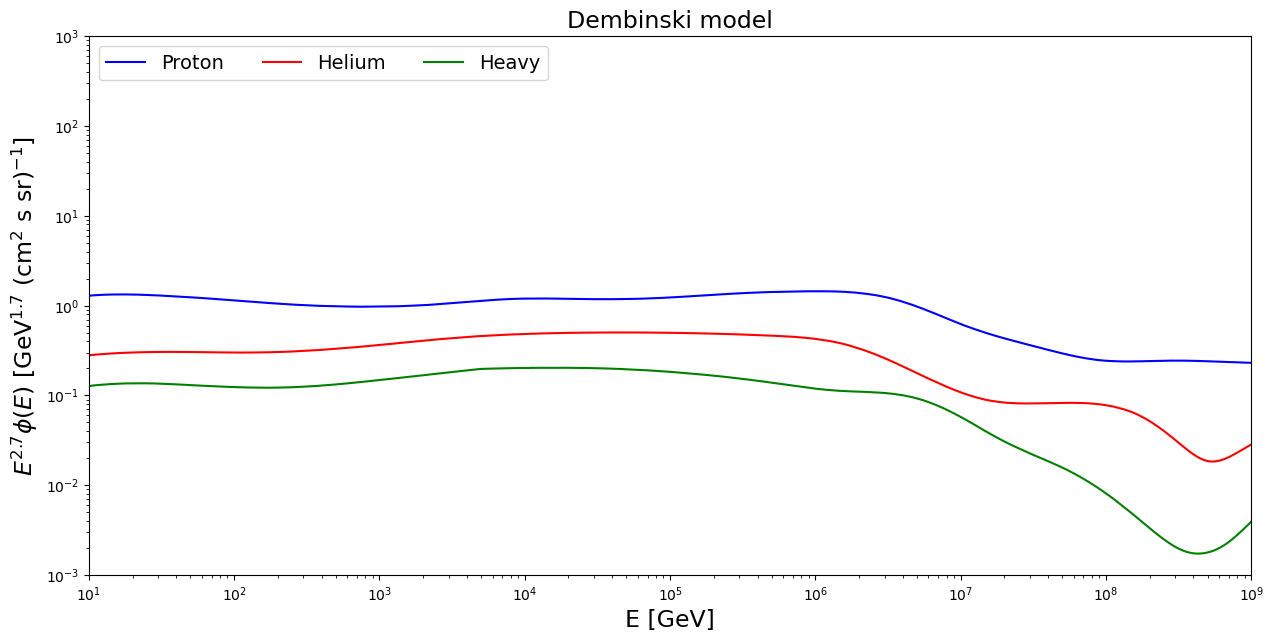

In [16]:
alpha = 2.7

plt.figure(figsize=(15, 7))
# Models
plt.plot(E, (phi_p_Dembinski/1e4) * E**alpha, color='blue', label='Proton')
plt.plot(E, (phi_He_Dembinski/1e4) * E**alpha, color='red', label='Helium')
plt.plot(E, (phi_heavy_Dembinski/1e4) * E**alpha, color='green', label='Heavy')
# Data
plt.loglog()
plt.xlim(1e1, 1e9)
#plt.ylim(1e0, 3e0)
plt.ylim(1e-3, 1e3)
plt.xlabel('E [GeV]', fontsize=17)
plt.ylabel(r'$E^{2.7}\phi(E)$ [GeV$^{1.7}$ (cm$^2$ s sr)$^{-1}$]', fontsize=17)
plt.legend(ncol=3, fontsize=14, loc='upper left')
plt.title('Dembinski model', fontsize=17)

## Espinosa-Lipari model

### Best fit values of proton model:
##### K: 0.0454255
##### alpha_3: 2.814
##### alpha_4: 1.335
##### alpha_5: 4.025
##### omega3: 0.648
##### omega4: 0.941
##### E3: 0.799 PeV
##### E4: 3.777 PeV

##### chi^2_min: 23.0955988
##### N_dof: 144
##### Reduced chi^2_min: 0.1603861

### Best fit values of proton model:
###### K: 0.0332187
###### alpha_1: 2.702
###### alpha_2: 2.464
###### alpha_3: 2.733
###### alpha_4: 2.3
###### alpha_5: 4.22
###### omega1: 0.272
###### omega2: 0.056
###### omega3: 0.1
###### omega4: 0.701
###### E1: 1.207 TeV
###### E2: 32.014 TeV
###### E3: 0.526 PeV
###### E4: 6.168 PeV

###### chi^2_min: 25.3381327
###### N_dof: 155
###### Reduced chi^2_min: 0.1634718

In [20]:
# Model for proton
def Phi_proton_nucleon(E):
    n = 1
    K = 0.0454255 * n**2
    E0 = 0.1 / n
    alpha1 = 2.805; alpha2 = 2.56; alpha3 = 2.814; alpha4 = 1.335; alpha5 = 4.025
    omega1 = 0.28; omega2 = 0.163; omega3 = 0.648; omega4 = 0.941
    Eb1 = 0.670 / n; Eb2 = 16 / n; Eb3 = 0.799 / n; Eb4 = 3.777  / n
    delta1 = alpha2 - alpha1
    delta2 = alpha3 - alpha2
    delta3 = alpha4 - alpha3
    delta4 = alpha5 - alpha4
    phi = K * ((E/1e3) / E0)**(-alpha3) * (1 + ((E/1e3) / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + ((E/1e3) / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3) * (1 + ((E/1e6) / Eb4)**(1 / omega4))**(-delta4 * omega4)
    return phi

# Model for He
def Phi_He_nucleon(E):
    n = 4
    K = 0.0332187 * n**2
    E0 = 0.1 / n
    alpha1 = 2.702; alpha2 = 2.464; alpha3 = 2.733; alpha4 = 2.3; alpha5 = 4.22
    omega1 = 0.272; omega2 = 0.056; omega3 = 0.1; omega4 = 0.701
    Eb1 = 1.207 / n; Eb2 = 32.014 / n; Eb3 = 0.526 / n; Eb4 = 6.168 / n
    delta1 = alpha2 - alpha1
    delta2 = alpha3 - alpha2
    delta3 = alpha4 - alpha3
    delta4 = alpha5 - alpha4
    phi = K * ((E/1e3) / E0)**(-alpha3) * (1 + ((E/1e3) / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + ((E/1e3) / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3) * (1 + ((E/1e6) / Eb4)**(1 / omega4))**(-delta4 * omega4)
    return phi

# Model for He
def Phi_He_shape(E):
    n = 4
    E0 = 0.1 / n
    alpha1 = 2.702; alpha2 = 2.464; alpha3 = 2.733; alpha4 = 2.3; alpha5 = 4.22
    omega1 = 0.272; omega2 = 0.056; omega3 = 0.1; omega4 = 0.701
    Eb1 = 1.207 / n; Eb2 = 32.014 / n; Eb3 = 0.526 / n; Eb4 = 6.168 / n
    delta1 = alpha2 - alpha1
    delta2 = alpha3 - alpha2
    delta3 = alpha4 - alpha3
    delta4 = alpha5 - alpha4
    phi = ((E/1e3) / E0)**(-alpha3) * (1 + ((E/1e3) / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + ((E/1e3) / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3) * (1 + ((E/1e6) / Eb4)**(1 / omega4))**(-delta4 * omega4)
    return phi

# Model for heavy nuclei
def Phi_heavy_nucleon(E, A):
    KA = 1 * (0.0454255 + (0.0332187 * 2**2.702)) * (2**2.702 * A**-2.702)
    return KA * A**2 * Phi_He_shape(E)

# Model for all particles
def Phi_total_nucleon(E):
    phi = Phi_proton_nucleon(E) + Phi_He_nucleon(E) + Phi_heavy_nucleon(E,12)
    return phi

Text(0.5, 1.0, 'My model')

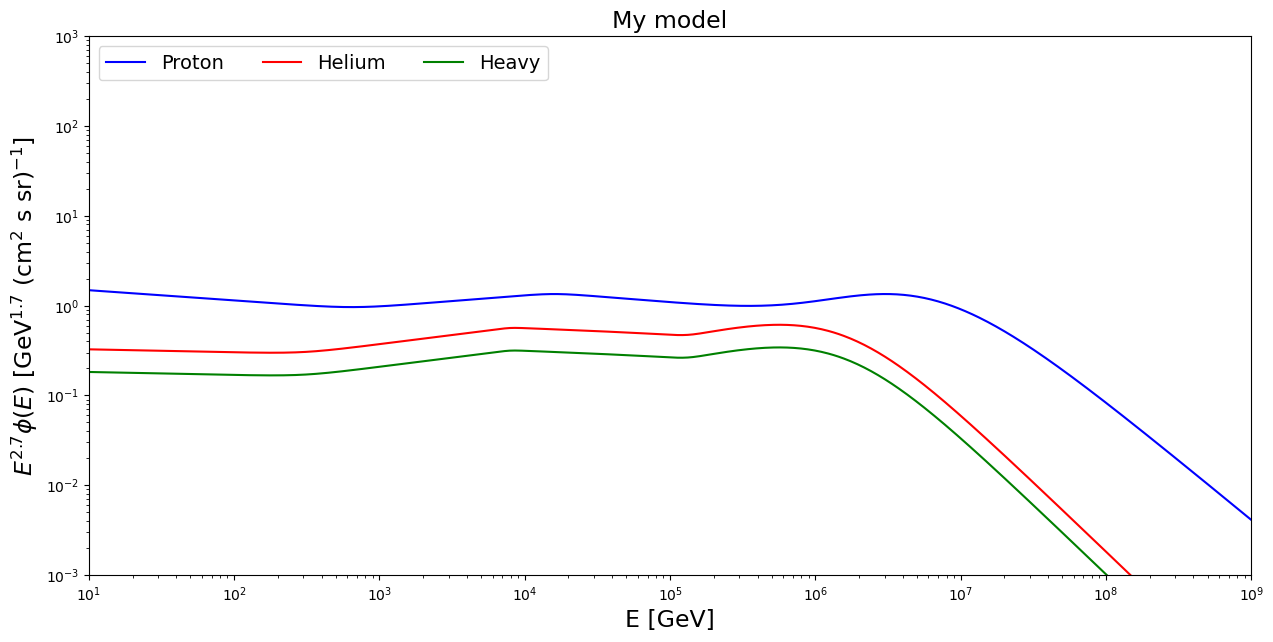

In [21]:
alpha = 2.7

plt.figure(figsize=(15, 7))
# Models
plt.plot(E, (Phi_proton_nucleon(E)/1e4) * E**alpha, color='blue', label='Proton')
plt.plot(E, (Phi_He_nucleon(E)/1e4) * E**alpha, color='red', label='Helium')
plt.plot(E, (Phi_heavy_nucleon(E, 12)/1e4) * E**alpha, color='green', label='Heavy')
# Data
plt.loglog()
plt.xlim(1e1, 1e9)
#plt.ylim(1e0, 3e0)
plt.ylim(1e-3, 1e3)
plt.xlabel('E [GeV]', fontsize=17)
plt.ylabel(r'$E^{2.7}\phi(E)$ [GeV$^{1.7}$ (cm$^2$ s sr)$^{-1}$]', fontsize=17)
plt.legend(ncol=3, fontsize=14, loc='upper left')
plt.title('My model', fontsize=17)

## Prevotat model

In [22]:
# Values chosen for DAMPE analysis
def Intensity(Z, N, E0, E1, gamma, E, n):
    E0 = Z * E0 / n
    E1 = Z * E1 / n
    I = (N / E0**2.5) * (E / E0)**(-gamma) * np.exp( - (E0 / E) - (E / E1)) * n**(-0.5)
    return I

# Protons
def I_p(N1, E01, E11, gamma1, N2, E02, E12, gamma2, N3, E03, E13, gamma3, N4, E04, E14, gamma4, E):
    I1 = Intensity(1, N1, E01, E11, gamma1, E, 1)
    I2 = Intensity(1, N2, E02, E12, gamma2, E, 1)
    I3 = Intensity(1, N3, E03, E13, gamma3, E, 1)
    I4 = Intensity(1, N4, E04, E14, gamma4, E, 1)
    I_total = I1 + I2 + I3 + I4
    return I_total

N1 = 2.03e4; N2 = 3.67e3; N3 = 1.13e3; N4 = 2.55e3
E01 = 6.21e0; E02 = 2.20e1; E03 = 4.41e3; E04 = 7.90e5
E11 = 4.06e2; E12 = 2.81e4; E13 = 3.08e5; E14 = 1.90e7
gamma1 = 3.25; gamma2 = 2.59; gamma3 = 2.42; gamma4 = 3.02
intensity_p = I_p(N1, E01, E11, gamma1, N2, E02, E12, gamma2, N3, E03, E13, gamma3, N4, E04, E14, gamma4, E)

# Helium
def I_He(N1, E01, E11, gamma1, N2, E02, E12, gamma2, N3, E03, E13, gamma3, N4, E04, E14, gamma4, E):
    I1 = Intensity(2, N1, E01, E11, gamma1, E, 4)
    I2 = Intensity(2, N2, E02, E12, gamma2, E, 4)
    I3 = Intensity(2, N3, E03, E13, gamma3, E, 4)
    I4 = Intensity(2, N4, E04, E14, gamma4, E, 4)
    I_total = I1 + I2 + I3 + I4
    return I_total

N1 = 1.06e4; N2 = 2.73e3; N3 = 1.38e3; N4 = 1.73e3
E01 = 6.21e0; E02 = 2.20e1; E03 = 4.41e3; E04 = 7.90e5
E11 = 4.06e2; E12 = 2.81e4; E13 = 3.08e5; E14 = 1.90e7
gamma1 = 3.25; gamma2 = 2.59; gamma3 = 2.42; gamma4 = 3.02
intensity_He = I_He(N1, E01, E11, gamma1, N2, E02, E12, gamma2, N3, E03, E13, gamma3, N4, E04, E14, gamma4, E)

# CNO
def I_CNO(N1, E01, E11, gamma1, N2, E02, E12, gamma2, N3, E03, E13, gamma3, N4, E04, E14, gamma4, E):
    I1 = Intensity(7, N1, E01, E11, gamma1, E, 14)
    I2 = Intensity(7, N2, E02, E12, gamma2, E, 14)
    I3 = Intensity(7, N3, E03, E13, gamma3, E, 14)
    I4 = Intensity(7, N4, E04, E14, gamma4, E, 14)
    I_total = I1 + I2 + I3 + I4
    return I_total

N1 = 7.20e3; N2 = 2.10e3; N3 = 1.23e3; N4 = 7.01e2
E01 = 6.21e0; E02 = 2.20e1; E03 = 4.41e3; E04 = 7.90e5
E11 = 4.06e2; E12 = 2.81e4; E13 = 3.08e5; E14 = 1.90e7
gamma1 = 3.25; gamma2 = 2.59; gamma3 = 2.42; gamma4 = 3.02
intensity_CNO = I_CNO(N1, E01, E11, gamma1, N2, E02, E12, gamma2, N3, E03, E13, gamma3, N4, E04, E14, gamma4, E)

# Iron
def I_Fe(N1, E01, E11, gamma1, N2, E02, E12, gamma2, N3, E03, E13, gamma3, N4, E04, E14, gamma4, E):
    I1 = Intensity(26, N1, E01, E11, gamma1, E, 56)
    I2 = Intensity(26, N2, E02, E12, gamma2, E, 56)
    I3 = Intensity(26, N3, E03, E13, gamma3, E, 56)
    I4 = Intensity(26, N4, E04, E14, gamma4, E, 56)
    I_total = I1 + I2 + I3 + I4
    return I_total

N1 = 2.50e3; N2 = 1.03e3; N3 = 1.00e2; N4 = 3.50e2
E01 = 6.21e0; E02 = 2.20e1; E03 = 4.41e3; E04 = 7.90e5
E11 = 4.06e2; E12 = 2.81e4; E13 = 3.08e5; E14 = 1.90e7
gamma1 = 3.25; gamma2 = 2.59; gamma3 = 2.42; gamma4 = 3.02
intensity_Fe = I_Fe(N1, E01, E11, gamma1, N2, E02, E12, gamma2, N3, E03, E13, gamma3, N4, E04, E14, gamma4, E)

Text(0.5, 1.0, 'Prevotat model')

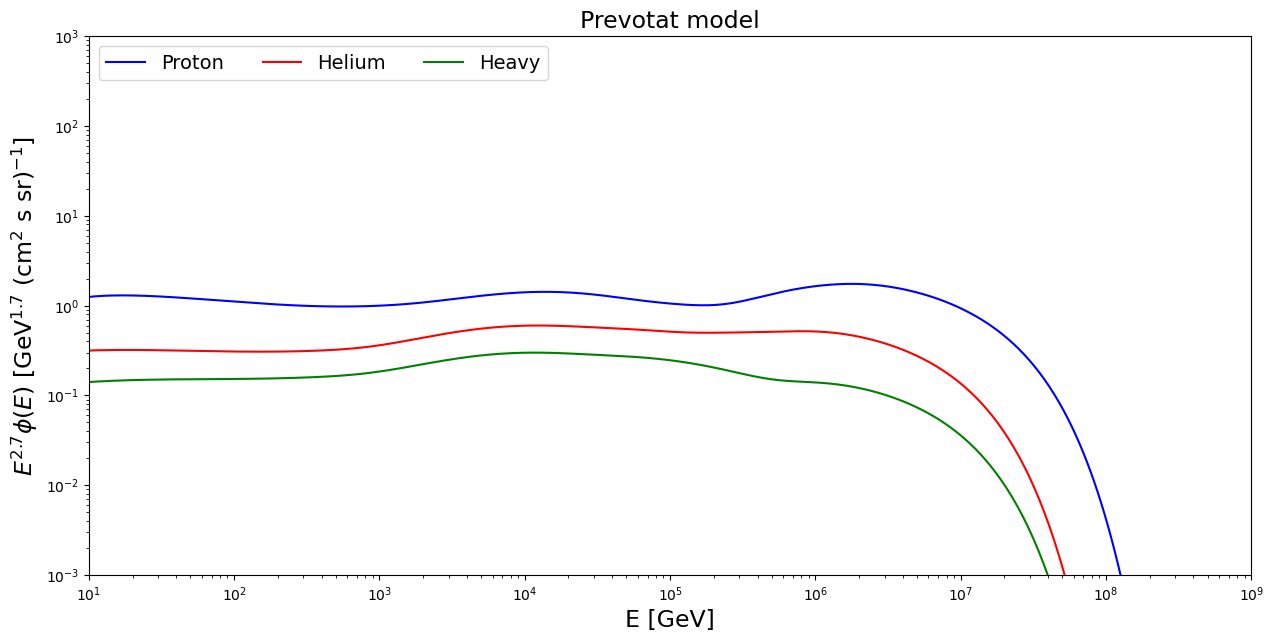

In [23]:
alpha = 2.7

plt.figure(figsize=(15, 7))
# Models
plt.plot(E, (intensity_p/1e4) * E**alpha, color='blue', label='Proton')
plt.plot(E, (intensity_He/1e4) * E**alpha, color='red', label='Helium')
plt.plot(E, ((intensity_CNO + intensity_Fe)/1e4) * E**alpha, color='green', label='Heavy')
# Data
plt.loglog()
plt.xlim(1e1, 1e9)
#plt.ylim(1e0, 3e0)
plt.ylim(1e-3, 1e3)
plt.xlabel('E [GeV]', fontsize=17)
plt.ylabel(r'$E^{2.7}\phi(E)$ [GeV$^{1.7}$ (cm$^2$ s sr)$^{-1}$]', fontsize=17)
plt.legend(ncol=3, fontsize=14, loc='upper left')
plt.title('Prevotat model', fontsize=17)

## LHAASO model (https://arxiv.org/abs/2305.05372)

In [37]:
def phi_LHAASO(E, A1, B1, C1, A2, B2, C2):
    # A in (GeV cm^2 s sr)^-1
    # C1 in TeV
    # C2 in PeV
    phi1 = A1 * (E / 1e3)**(-B1) * np.exp(-E / (C1*1e3) )
    phi2 = A2 * (E / 1e3)**(-B2) * np.exp(-E / (C1*1e6) )
    return phi1 + phi2

def phi_LHAASO_p_high(E):
    A1 = 3.40e-9
    B1 = 2.35
    C1 = 25.0
    A2 = 5.51e-9
    B2 = 2.60
    C2 = 15.0
    return phi_LHAASO(E, A1, B1, C1, A2, B2, C2)

def phi_LHAASO_p_low(E):
    A1 = 1.80e-9
    B1 = 2.35
    C1 = 25.0
    A2 = 5.71e-9
    B2 = 2.66
    C2 = 4.0
    return phi_LHAASO(E, A1, B1, C1, A2, B2, C2)
    
def phi_LHAASO_He_high(E):
    A1 = 0.75e-9
    B1 = 2.10
    C1 = 50.0
    A2 = 5.95e-9
    B2 = 2.55
    C2 = 13.0
    return phi_LHAASO(E, A1, B1, C1, A2, B2, C2)

def phi_LHAASO_He_low(E):
    A1 = 0.75e-9
    B1 = 2.10
    C1 = 50.0
    A2 = 4.55e-9
    B2 = 2.60
    C2 = 9.0
    return phi_LHAASO(E, A1, B1, C1, A2, B2, C2)

In [38]:
Phi_LHAASO_p_high = phi_LHAASO_p_high(E)
Phi_LHAASO_p_low = phi_LHAASO_p_low(E)
Phi_LHAASO_He_high = phi_LHAASO_He_high(E)
Phi_LHAASO_He_low = phi_LHAASO_He_low(E)

Text(0.5, 1.0, 'LHAASO model')

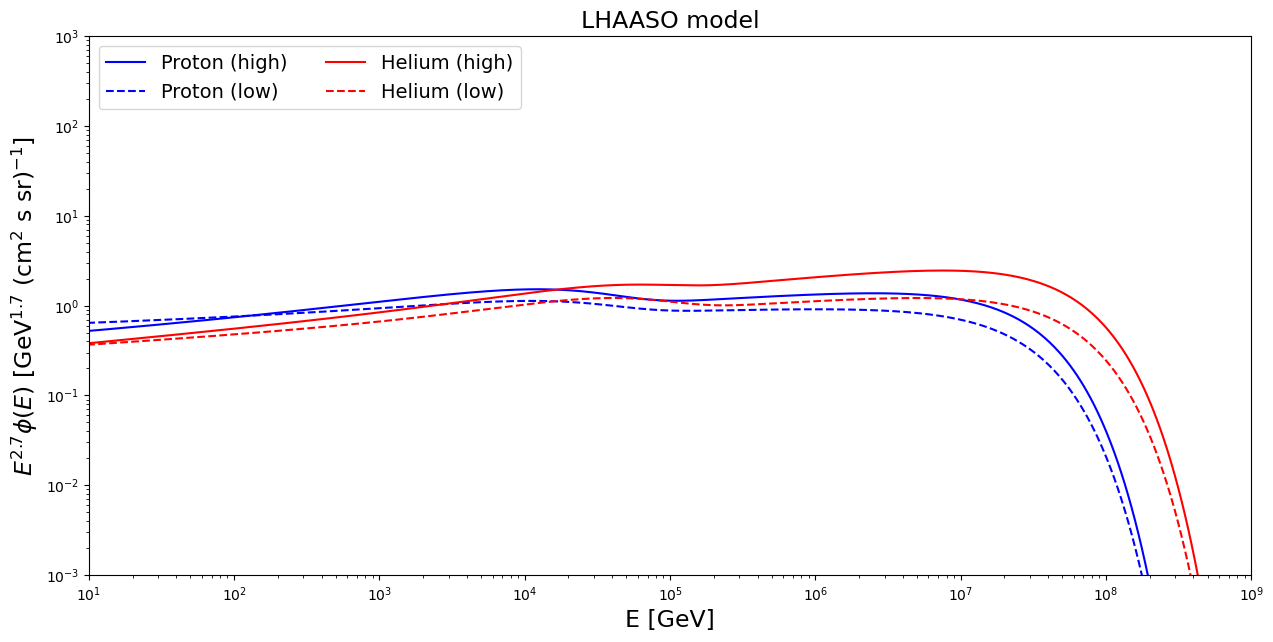

In [39]:
alpha = 2.7

plt.figure(figsize=(15, 7))
# Models
plt.plot(E, Phi_LHAASO_p_high * E**alpha, color='blue', label='Proton (high)')
plt.plot(E, Phi_LHAASO_p_low * E**alpha, color='blue', linestyle='--', label='Proton (low)')
plt.plot(E, Phi_LHAASO_He_high * E**alpha, color='red', label='Helium (high)')
plt.plot(E, Phi_LHAASO_He_low * E**alpha, color='red', linestyle='--', label='Helium (low)')
# Data
plt.loglog()
plt.xlim(1e1, 1e9)
#plt.ylim(1e0, 3e0)
plt.ylim(1e-3, 1e3)
plt.xlabel('E [GeV]', fontsize=17)
plt.ylabel(r'$E^{2.7}\phi(E)$ [GeV$^{1.7}$ (cm$^2$ s sr)$^{-1}$]', fontsize=17)
plt.legend(ncol=2, fontsize=14, loc='upper left')
plt.title('LHAASO model', fontsize=17)

## Plot comparison

In [40]:
E = E_Dembinski
flux_CR_Dembinski = phi_total_Dembinski / 1e4
flux_CR_Lipari = Phi_total_nucleon(E) / 1e4
flux_CR_Prevotat = (intensity_p + intensity_He + intensity_CNO + intensity_Fe) / 1e4
flux_CR_LHAASO_high = Phi_LHAASO_p_high + Phi_LHAASO_He_high

Text(0.5, 1.0, 'All particle spectrum')

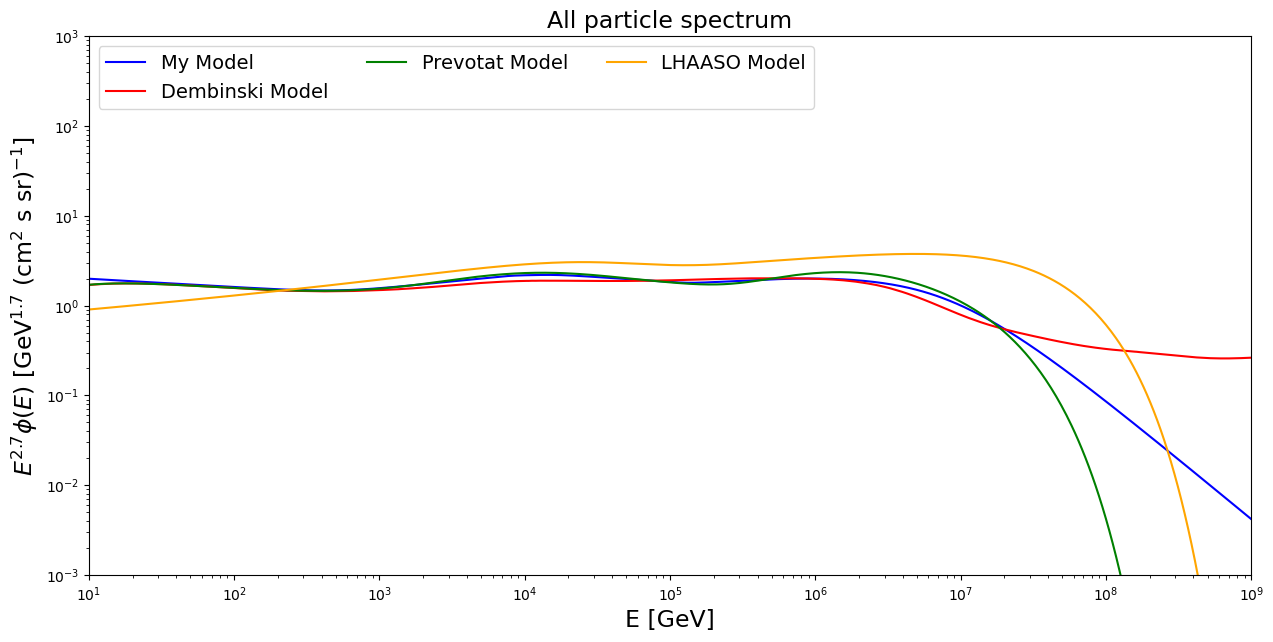

In [41]:
alpha = 2.7

plt.figure(figsize=(15, 7))
# Models
plt.plot(E, flux_CR_Lipari * E**alpha, color='blue', label='My Model')
plt.plot(E, flux_CR_Dembinski * E**alpha, color='red', label='Dembinski Model')
plt.plot(E, flux_CR_Prevotat * E**alpha, color='green', label='Prevotat Model')
plt.plot(E, flux_CR_LHAASO_high * E**alpha, color='orange', label='LHAASO Model')
# Data
plt.loglog()
plt.xlim(1e1, 1e9)
#plt.ylim(1e0, 3e0)
plt.ylim(1e-3, 1e3)
plt.xlabel('E [GeV]', fontsize=17)
plt.ylabel(r'$E^{2.7}\phi(E)$ [GeV$^{1.7}$ (cm$^2$ s sr)$^{-1}$]', fontsize=17)
plt.legend(ncol=3, fontsize=14, loc='upper left')
plt.title('All particle spectrum', fontsize=17)

## Comparison of heavy components

Text(0.5, 1.0, 'All particle spectrum')

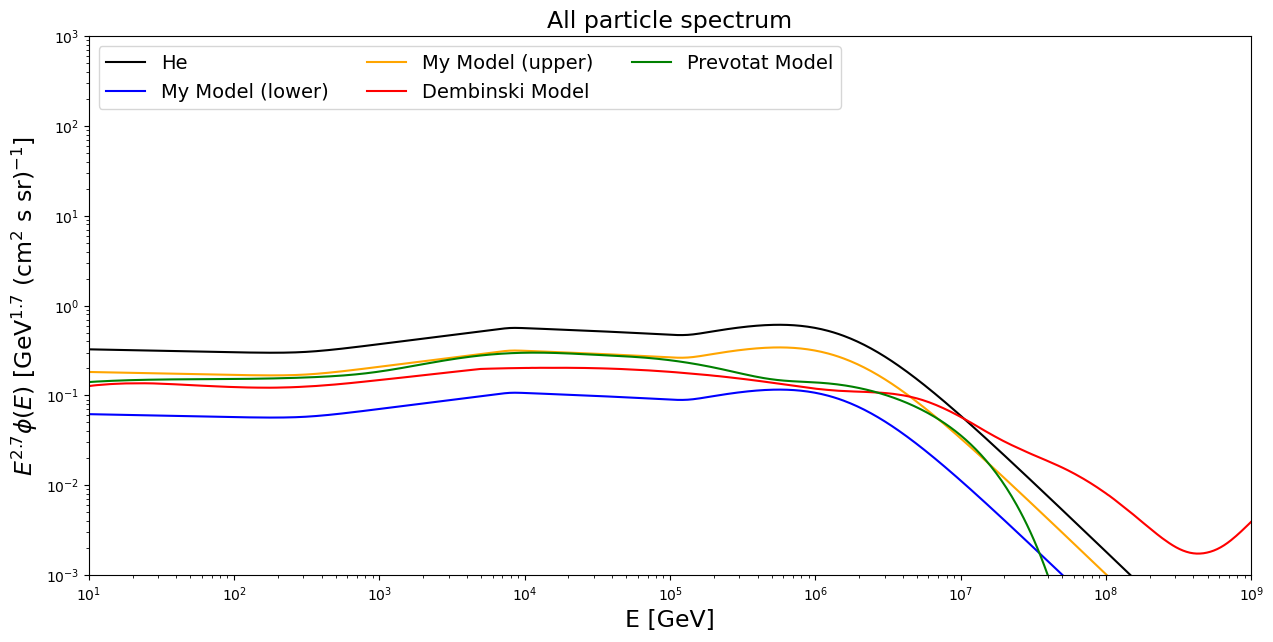

In [26]:
alpha = 2.7

plt.figure(figsize=(15, 7))
# Models
plt.plot(E, (Phi_He_nucleon(E)/1e4) * E**alpha, color='black', label='He')
plt.plot(E, (Phi_heavy_nucleon(E, 56)/1e4) * E**alpha, color='blue', label='My Model (lower)')
plt.plot(E, (Phi_heavy_nucleon(E, 12)/1e4) * E**alpha, color='orange', label='My Model (upper)')
plt.plot(E, (phi_heavy_Dembinski/1e4) * E**alpha, color='red', label='Dembinski Model')
plt.plot(E, ((intensity_CNO + intensity_Fe)/1e4) * E**alpha, color='green', label='Prevotat Model')
# Data
plt.loglog()
plt.xlim(1e1, 1e9)
#plt.ylim(1e0, 3e0)
plt.ylim(1e-3, 1e3)
plt.xlabel('E [GeV]', fontsize=17)
plt.ylabel(r'$E^{2.7}\phi(E)$ [GeV$^{1.7}$ (cm$^2$ s sr)$^{-1}$]', fontsize=17)
plt.legend(ncol=3, fontsize=14, loc='upper left')
plt.title('All particle spectrum', fontsize=17)